# Machine Learning End-Term Project

## Submitted by :  

####                Rishabh Saini 18CSU172


# Mechanism of Action

## Project Description

In this project, I implement Machine Learning with Python and Scikit-Learn.Cell Viability is estimated via Linear and Polynomial Regression. I build a classifier to predict which treatment a person will go with by training a binary classification model using Logistic Regression and classification. K-Means and Apriori algorithms were further added for more inference from the data. I have used the **MoA** dataset downloaded from the Kaggle website for this project.

## Table of Contents


The table of contents for this project is as follows:-


1.	Dataset description
2.	Import libraries
3.	Import dataset
4.	Exploratory Data Analysis
5.  Data Visualization
6.	Linear Regression
7. Polynomial Regression
8.	Logistic Regression
9. Decision Tree
10. Naive Bayes
11. SVM
12. K-Means
13. Association Rule Mining
14. Result


## 1. Dataset Description

| Column Name            | Description                                               |
| -------------          |:-------------                                            :| 
| __sig_id__                | Sample ID (numerical)           | 
| __cp_type__ | Treatment Type, (categorical)      |  
| __cp_time__ | Treatment Duration (numerical)    | 
| __cp_dose__             | Type of dose, high or low| 
| __g-x__ | Gene Expression data (numerical)    | 
| __c-0__ | Cell Viability Data (numerical)    | 

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

## 3. Importing Dataset

In [2]:
data = 'train_features.csv'

training_set = pd.read_csv(data)

In [3]:
# view dimensions of dataset

training_set.shape

(2112, 10)

In [4]:
training_set.head()


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,c-0
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-0.0600
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.0927
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,-0.1312
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.3998
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.3774


## 4. Exploratory Data Analysis

In [5]:
col_names = training_set.columns

col_names

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'c-0'],
      dtype='object')

In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sig_id   2112 non-null   object 
 1   cp_type  2112 non-null   object 
 2   cp_time  2112 non-null   int64  
 3   cp_dose  2112 non-null   object 
 4   g-0      2112 non-null   float64
 5   g-1      2112 non-null   float64
 6   g-2      2112 non-null   float64
 7   g-3      2112 non-null   float64
 8   g-4      2112 non-null   float64
 9   c-0      2112 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 165.1+ KB


In [7]:
categorical = [var for var in training_set.columns if training_set[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['sig_id', 'cp_type', 'cp_dose']


In [8]:

training_set[categorical].head()

,sig_id,cp_type,cp_dose
0,id_000644bb2,trt_cp,D1
1,id_000779bfc,trt_cp,D1
2,id_000a6266a,trt_cp,D1
3,id_0015fd391,trt_cp,D1
4,id_001626bd3,trt_cp,D2


In [9]:
training_set[categorical].isnull().sum()

sig_id     0
cp_type    0
cp_dose    0
dtype: int64

In [10]:
numerical = [var for var in training_set.columns if training_set[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['cp_time', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'c-0']


In [11]:

training_set[numerical].head()

,cp_time,g-0,g-1,g-2,g-3,g-4,c-0
0,24,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-0.0600
1,72,0.0743,0.4087,0.2991,0.0604,1.0190,0.0927
2,48,0.6280,0.5817,1.5540,-0.0764,-0.0323,-0.1312
3,48,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.3998
4,72,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.3774


In [12]:
training_set

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,c-0
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-0.0600
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.0927
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,-0.1312
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.3998
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.3774
...,...,...,...,...,...,...,...,...,...,...
2107,id_16a918bc4,trt_cp,72,D1,-0.7991,0.3067,0.4350,-1.4600,0.4923,0.3486
2108,id_16aa97597,trt_cp,24,D2,-0.3627,0.1414,0.6238,-0.1841,0.6299,-0.4333
2109,id_16ab940da,trt_cp,48,D2,0.7183,0.4706,-0.9542,1.4390,0.7732,-0.3688
2110,id_16ae2c9c1,trt_cp,48,D1,-0.9685,0.5579,-0.6941,-0.0819,-0.7420,0.3486


In [13]:
training_set.drop('sig_id',axis=1,inplace=True)

In [14]:
training_set

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,c-0
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-0.0600
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.0927
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,-0.1312
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.3998
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.3774
...,...,...,...,...,...,...,...,...,...
2107,trt_cp,72,D1,-0.7991,0.3067,0.4350,-1.4600,0.4923,0.3486
2108,trt_cp,24,D2,-0.3627,0.1414,0.6238,-0.1841,0.6299,-0.4333
2109,trt_cp,48,D2,0.7183,0.4706,-0.9542,1.4390,0.7732,-0.3688
2110,trt_cp,48,D1,-0.9685,0.5579,-0.6941,-0.0819,-0.7420,0.3486


# 5. Data Visualization

### 1. What is the correlation between genes and cell viability?

<AxesSubplot:>

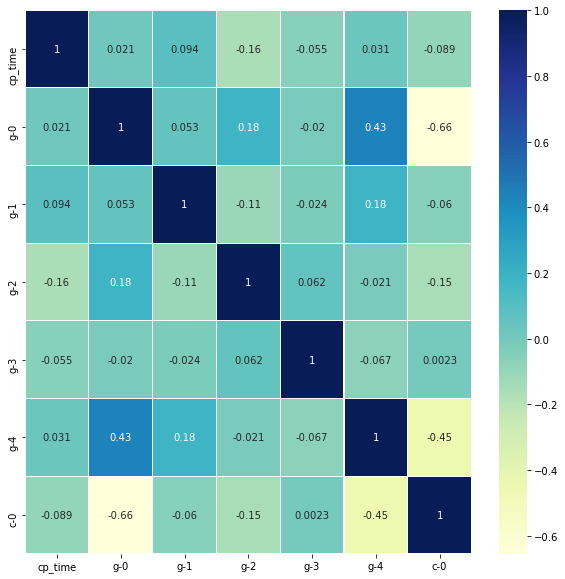

In [15]:
corrmat = training_set.corr() 
  
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

From above, there is __positive correlation__ between __g-3__ and __c-0__, whereas all other genes exhibit negative correlation with cell viability.

### 2. How many  types of treatment are there? 

Text(0.5, 1.0, 'Pie Plot- Dose')

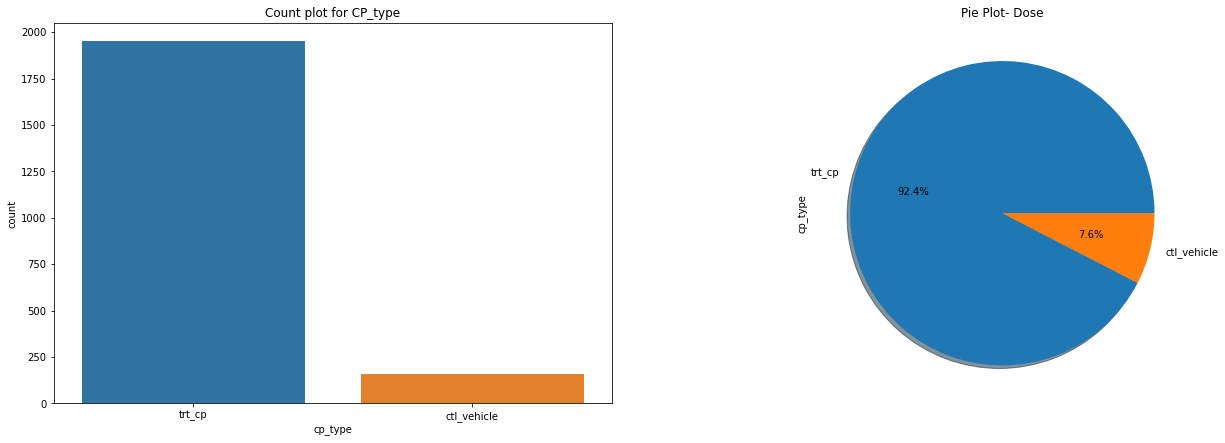

In [16]:
f,ax = plt.subplots(1,2,figsize=(22,7))


sns.countplot(x='cp_type',ax=ax[0], data=training_set).set_title('Count plot for CP_type')

training_set['cp_type'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Pie Plot- Dose')

This indicates that there are __two__ types of treatments and __trt_cp__ is the one being used the most.

### 3. How is cell viability distributed? 

/home/rajan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='c-0', ylabel='Density'>

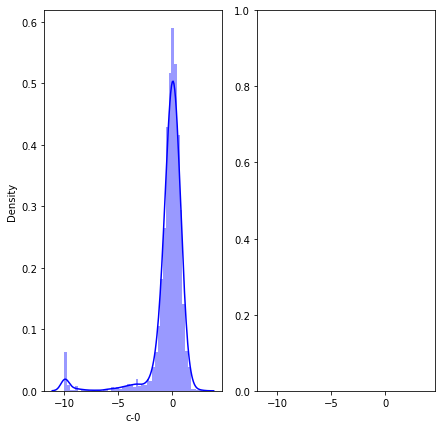

In [17]:
f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)                                    # Set up the matplotlib figure



sns.distplot(training_set['c-0'], color="b", ax=axes[0])



The given variable is __left skewed__.

## 4. How much time are doses taking to take effect?

<AxesSubplot:xlabel='cp_dose', ylabel='count'>

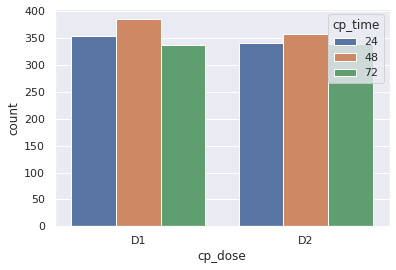

In [112]:
sns.countplot(x='cp_dose',data=training_set,hue='cp_time')

We see in both cases, __48 hours__ has the upper hand.

# 6. Linear Regression

In [18]:
abc=training_set['g-0']

In [19]:
X=pd.DataFrame(abc)

In [20]:
abc1=training_set['c-0']

In [21]:
y=pd.DataFrame(abc1)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 ,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

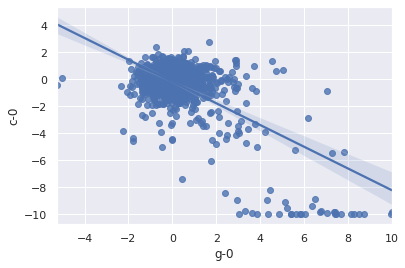

In [25]:
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['g-0'] = X_train['g-0']
dataframe_training['c-0'] = y_train
ax = sns.regplot(x="g-0", y="c-0", data= dataframe_training)

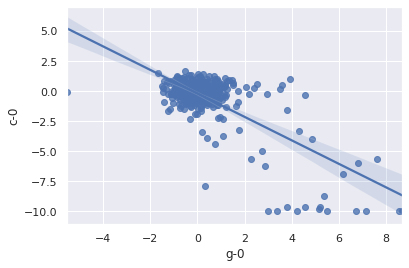

In [26]:
dataframe_test = pd.DataFrame()
dataframe_test['g-0'] = X_test['g-0']
dataframe_test['c-0'] = y_test
ax = sns.regplot(x="g-0", y="c-0", data= dataframe_test)

In [27]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Coefficients: 
 [[-0.804725]]
Intercept: 
 [-0.15764423]
Mean squared error: 2.0935572209320785
Variance score: 0.48320907498010224


### Result

In [28]:
import statsmodels.api as sm


x = sm.add_constant(X)

results = sm.OLS(endog = y, exog=x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    c-0   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1586.
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          3.60e-259
Time:                        09:55:48   Log-Likelihood:                -3553.7
No. Observations:                2112   AIC:                             7111.
Df Residuals:                    2110   BIC:                             7123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1641      0.029     -5.721      0.000      -0.220      -0.108
g-0           -0.8471      0.021    -39.827      0.000      -0.889      -0.805
==============================================================================
Omnibus:                      706.279   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4513.166
Skew:                          -1.422   Prob(JB):                         0.00
Kurtosis:                       9.572   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. Polynomial Regression

In [29]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1) 

In [30]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 4) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression()

In [32]:
y_poly_pred = linear_regressor_2.predict(X_polynomial)

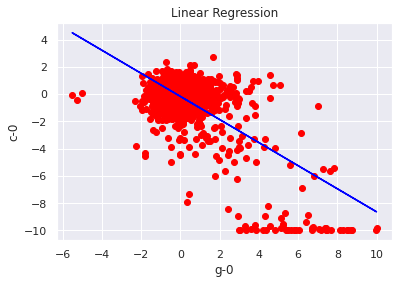

In [33]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('g-0')
plt.ylabel('c-0')
plt.show()


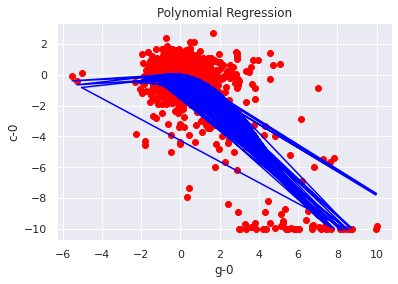

In [34]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('g-0')
plt.ylabel('c-0')
plt.show()

## R2 Score

In [35]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:", rmse)
print("R2 Score:", r2)

Root Mean Square Error: 1.1342955651596236
R2 Score: 0.566538375801366


In [36]:
training_set

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,c-0
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-0.0600
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.0927
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,-0.1312
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.3998
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.3774
...,...,...,...,...,...,...,...,...,...
2107,trt_cp,72,D1,-0.7991,0.3067,0.4350,-1.4600,0.4923,0.3486
2108,trt_cp,24,D2,-0.3627,0.1414,0.6238,-0.1841,0.6299,-0.4333
2109,trt_cp,48,D2,0.7183,0.4706,-0.9542,1.4390,0.7732,-0.3688
2110,trt_cp,48,D1,-0.9685,0.5579,-0.6941,-0.0819,-0.7420,0.3486


## Dropping Target

In [37]:
X = training_set.drop(['cp_type','cp_dose'],axis=1).values
y = training_set['cp_type'].values




## Feature Scaling

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#  8. Logistic Regression

In [39]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split




In [40]:
# check the shape of X_train and X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
X_train

array([[-1.2311012 ,  0.0255221 ,  0.54909417, ..., -2.88915131,
        -0.16779152,  0.27909543],
       [ 1.25226626, -0.51508003,  0.71476311, ..., -1.16655604,
         1.11421098, -2.70785018],
       [ 1.25226626, -0.68184636, -2.1974189 , ...,  0.85386014,
        -2.36963058,  0.09695681],
       ...,
       [ 1.25226626,  0.11198242, -0.69200848, ...,  0.93785268,
        -1.32122954,  0.02330038],
       [ 1.25226626, -1.19437891,  0.04544583, ...,  0.04107728,
        -0.49097468, -0.63920127],
       [-1.2311012 ,  0.71420253,  0.02982597, ...,  1.22391891,
         0.80254547,  0.36041353]])

In [42]:
y_train

array(['trt_cp', 'trt_cp', 'trt_cp', ..., 'trt_cp', 'trt_cp', 'trt_cp'],
      dtype=object)

In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:

y_proba = classifier.predict_proba(X_train)
y_proba

array([[0.11367879, 0.88632121],
       [0.00593991, 0.99406009],
       [0.1570408 , 0.8429592 ],
       ...,
       [0.06855536, 0.93144464],
       [0.07065226, 0.92934774],
       [0.04808567, 0.95191433]])

In [45]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['trt_cp', 'trt_cp', 'trt_cp', ..., 'trt_cp', 'trt_cp', 'trt_cp'],
      dtype=object)

In [46]:
y_train

array(['trt_cp', 'trt_cp', 'trt_cp', ..., 'trt_cp', 'trt_cp', 'trt_cp'],
      dtype=object)

## Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


<AxesSubplot:>

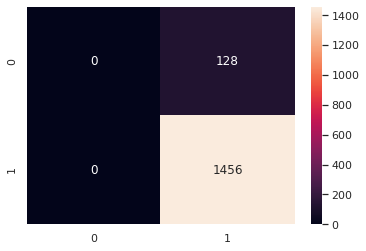

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [48]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp',
       'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_cp', 'trt_

<AxesSubplot:>

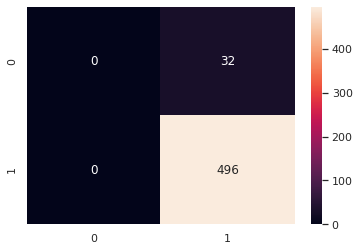

In [49]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

## Classification Report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

 ctl_vehicle       0.00      0.00      0.00        32
      trt_cp       0.94      1.00      0.97       496

    accuracy                           0.94       528
   macro avg       0.47      0.50      0.48       528
weighted avg       0.88      0.94      0.91       528



/home/rajan/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_predict_test)*100,"%")

Accuracy:  93.93939393939394 %


# 9. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
y_pred = classifier.predict(X_test)


## Confusion Matrix

<AxesSubplot:>

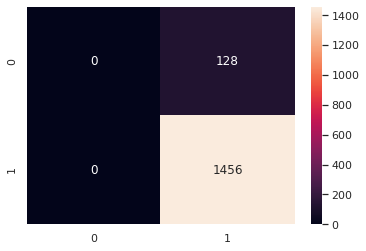

In [54]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

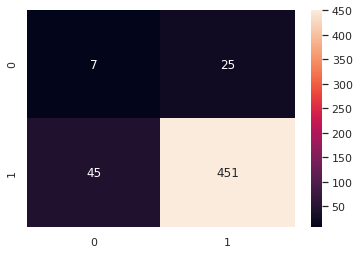

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

## Classification Report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 ctl_vehicle       0.13      0.22      0.17        32
      trt_cp       0.95      0.91      0.93       496

    accuracy                           0.87       528
   macro avg       0.54      0.56      0.55       528
weighted avg       0.90      0.87      0.88       528



In [57]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy:  86.74242424242425 %


# 10. Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

<AxesSubplot:>

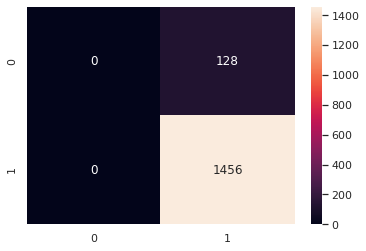

In [60]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

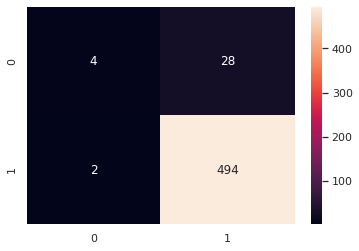

In [61]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

## Classification Report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 ctl_vehicle       0.67      0.12      0.21        32
      trt_cp       0.95      1.00      0.97       496

    accuracy                           0.94       528
   macro avg       0.81      0.56      0.59       528
weighted avg       0.93      0.94      0.92       528



In [63]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy:  94.31818181818183 %


# 11. SVM

In [64]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [65]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

<AxesSubplot:>

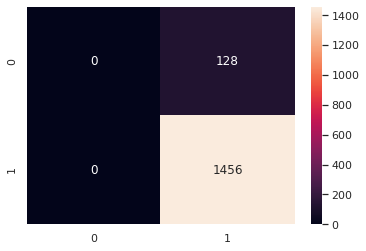

In [66]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

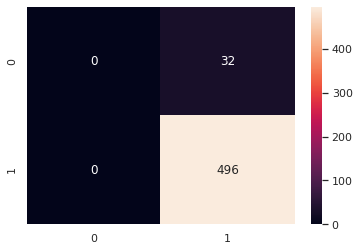

In [67]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

## Classification Report

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 ctl_vehicle       0.00      0.00      0.00        32
      trt_cp       0.94      1.00      0.97       496

    accuracy                           0.94       528
   macro avg       0.47      0.50      0.48       528
weighted avg       0.88      0.94      0.91       528



/home/rajan/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy:  93.93939393939394 %


# 12. K-Means

In [70]:
training_set

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,c-0
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-0.0600
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.0927
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,-0.1312
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.3998
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.3774
...,...,...,...,...,...,...,...,...,...
2107,trt_cp,72,D1,-0.7991,0.3067,0.4350,-1.4600,0.4923,0.3486
2108,trt_cp,24,D2,-0.3627,0.1414,0.6238,-0.1841,0.6299,-0.4333
2109,trt_cp,48,D2,0.7183,0.4706,-0.9542,1.4390,0.7732,-0.3688
2110,trt_cp,48,D1,-0.9685,0.5579,-0.6941,-0.0819,-0.7420,0.3486


In [71]:
X = training_set.drop(['cp_dose', 'cp_type'], axis=1)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [73]:
from sklearn.decomposition import PCA
pca = PCA()

In [74]:
pca.fit(X)

PCA()

In [75]:
pca.explained_variance_ratio_

array([0.29882029, 0.18671045, 0.14019742, 0.13264408, 0.11501266,
       0.0779957 , 0.0486194 ])

Text(0, 0.5, 'Cumulative Explained Variance')

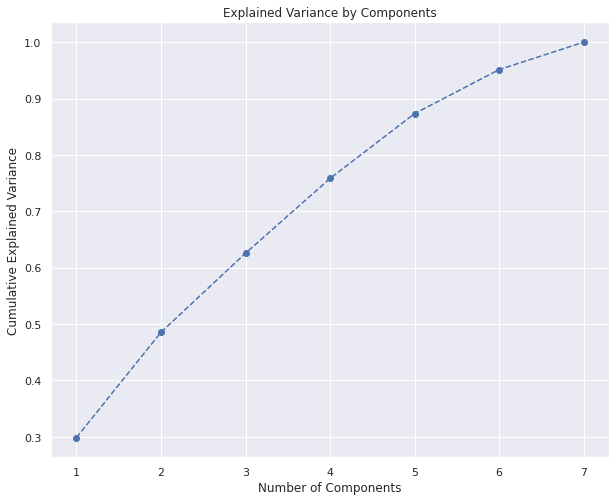

In [76]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [77]:
pca = PCA(n_components = 4)

In [78]:
pca.fit(X)

PCA(n_components=4)

In [79]:
pca.transform(X)

array([[ 0.16187366, -0.09451223, -0.38177379,  1.4576179 ],
       [ 0.4573645 , -1.0698119 ,  0.30358828, -0.30989836],
       [ 0.38097133,  0.38362307,  0.08410536,  0.50122101],
       ...,
       [ 0.47770957, -0.64473328,  1.70948789,  0.16718595],
       [-1.15000754, -0.92945342,  0.25688723,  0.45186248],
       [-0.7649844 , -0.13821435,  0.48296482, -0.33681645]])

In [80]:
X = pca.transform(X)

## Using Elbow Method

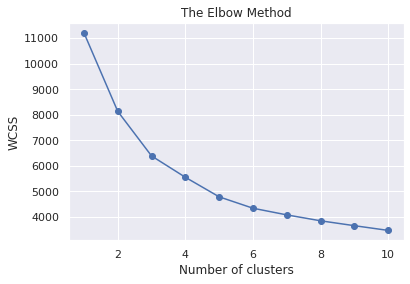

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [82]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [83]:
kmeans.inertia_

4782.198282989257

In [84]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

# Performance Measures

## Silhouette Coefficient

Its value ranges from -1 to 1 and the data is set to be better clustered if the value is closer to 1.

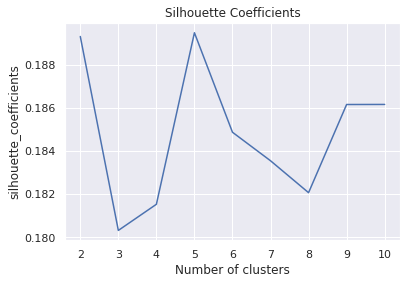

In [85]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

In [86]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [87]:
kmeans.inertia_

4782.218357017613

In [88]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [89]:
kmeans_silhouette

0.22872458930669434

In [90]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [91]:
kmeans.inertia_

8132.7881401835975

In [92]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [93]:
kmeans_silhouette

0.6912529549821051

As observed with __k=3__ the silhouette score increases hence we can claim that k=3 gives __optimal__ clusters. 

## Davies Bouldin Index

In [94]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
print(davies_bouldin_score(X,labels))

0.6606773292352145


The __lower__ the value of this index, the __better__ clustering quality. It is safe to say looking at the score that the algorithm has worked __efficiently__.

## Plotting Clusters

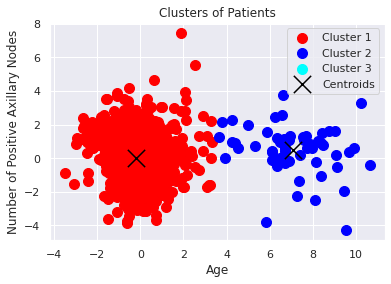

In [95]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3') 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', marker= 'x', label = 'Centroids')
plt.title('Clusters of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Positive Axillary Nodes')
plt.legend()
plt.show()

# 13. Association Rule Mining

In [96]:
t2 = training_set.drop(['g-0', 'g-1', 'g-2', 'g-3', 'g-4'], axis=1)

In [97]:
t2

,cp_type,cp_time,cp_dose,c-0
0,trt_cp,24,D1,-0.0600
1,trt_cp,72,D1,0.0927
2,trt_cp,48,D1,-0.1312
3,trt_cp,48,D1,-0.3998
4,trt_cp,72,D2,-0.3774
...,...,...,...,...
2107,trt_cp,72,D1,0.3486
2108,trt_cp,24,D2,-0.4333
2109,trt_cp,48,D2,-0.3688
2110,trt_cp,48,D1,0.3486


## Converting training_set into transactions

In [98]:
transactions = []
for i in range(0, len(training_set)):
    transactions.append([str(training_set.values[i,j]) for j in range(0,3)])

In [99]:
transactions

[['trt_cp', '24', 'D1'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '72', 'D2'],
 ['trt_cp', '24', 'D1'],
 ['trt_cp', '24', 'D2'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '72', 'D2'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '24', 'D2'],
 ['trt_cp', '72', 'D2'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '72', 'D2'],
 ['ctl_vehicle', '48', 'D1'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '48', 'D1'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '72', 'D1'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '24', 'D2'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '48', 'D2'],
 ['trt_cp', '24', 'D1'],
 ['trt_cp', '48', 'D1'],
 ['ctl_vehicle', '24', 'D1'],
 ['trt_cp', '24

### Encoding 

In [100]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,24,48,72,D1,D2,ctl_vehicle,trt_cp
0,True,False,False,True,False,False,True
1,False,False,True,True,False,False,True
2,False,True,False,True,False,False,True
3,False,True,False,True,False,False,True
4,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...
2107,False,False,True,True,False,False,True
2108,True,False,False,False,True,False,True
2109,False,True,False,False,True,False,True
2110,False,True,False,True,False,False,True


# Apriori

__Apriori__ algorithm is given by R. Agrawal and R. Srikant in 1994 for finding frequent itemsets in a dataset for boolean association rule. Name of the algorithm is Apriori because it uses __prior knowledge__ of frequent itemset properties.

__Apriori Property –_
*All non-empty subset of frequent itemset must be frequent.*

In [101]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.4)

,support,itemsets
0,0.509470,(3)
1,0.490530,(4)
2,0.924242,(6)
3,0.470170,"(3, 6)"
4,0.454072,"(4, 6)"


In [102]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.509470,(D1),1
1,0.490530,(D2),1
2,0.924242,(trt_cp),1
3,0.470170,"(D1, trt_cp)",2
4,0.454072,"(D2, trt_cp)",2


In [103]:
frequent_itemsets[ (frequent_itemsets['length'] >= 2)]

,support,itemsets,length
3,0.470170,"(D1, trt_cp)",2
4,0.454072,"(D2, trt_cp)",2


In [104]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.92)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(D1),(trt_cp),0.50947,0.924242,0.470170,0.922862,0.998507,-0.000703,0.982110
1,(D2),(trt_cp),0.49053,0.924242,0.454072,0.925676,1.001551,0.000703,1.019284


### Choice of Interesting Rules

Confidence is often misleading, hence to choose rules which actually means something, we use Lift.

In [105]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(D2),(trt_cp),0.490530,0.924242,0.454072,0.925676,1.001551,0.000703,1.019284
1,(trt_cp),(D2),0.924242,0.490530,0.454072,0.491291,1.001551,0.000703,1.001495


### Saving Rules to a txt and excel file

In [106]:
rules.to_csv('arules.txt', header=True, index=False, sep='\t', mode='a')

In [107]:
rules.to_excel("arules.xlsx", sheet_name='Sheet_name_1')  

# Result

In [108]:
lst = ['Linear', 'Polynomial', 'Logistic', 'Decision Tree', 'Naive Bayes', 'SVM']
lst2 = ['42%', '56%', '94%', '86.5%', '94.3%', '93.9%']

In [109]:
df = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Algorithm', 'Accuracy']) 
df 

,Algorithm,Accuracy
0,Linear,42%
1,Polynomial,56%
2,Logistic,94%
3,Decision Tree,86.5%
4,Naive Bayes,94.3%
5,SVM,93.9%


We also saw how __K-Means__ helped us in clustering gene expression data with cell viability. Further __Association Rule Mining__ was done to find what kind of treatment and what dose is actually helping people.